In [1]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

# Abstract 

__NOTE: Abstract should be short but give but give the overall idea: what was done, what was found, and wat are the main conclusions 

Keywords: LVIS, Biomass index, LIDAR, AGBD, Allometric

# Introduction 

__NOTE: Move1: Introduce the topic and emphasize why is it important __


It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move2: Relate to current knowledge 
The current way of calculating biomass is using the lidar height metrics. Talk about RH values  RH100 is the top of the canopy. 

It is important ecosystem modeling studies and the advancement of many of those processes

__NOTE:Move3: Introduce your work give the purpose and main objective 


Talk about the Allometric relationship ,Biomass index ,AGBD – aboveground biomass density 

# Methodogly 

## DATA 

In [2]:
datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

In [3]:
tree.columns

Index(['OID_', 'OID1', 'plot', 'subplot', 'tree_date', 'family', 'species',
       'wsg', 'tree', 'stem', 'epsg', 'x', 'y', 'status', 'allom_key',
       'a_stem', 'h_t', 'h_t_mod', 'd_stem', 'd_stem_val', 'd_ht', 'm_agb'],
      dtype='object')

In [4]:
# list of values of 'Marks' column 
marks_list = tree['family'].unique() 
marks_list


array(['Irvingiaceae', 'Vochysiaceae', 'Humiriaceae', 'Ctenolophonaceae',
       nan, 'Fabaceae', 'Burseraceae', 'Myristicaceae', 'Apocynaceae',
       'Rubiaceae', 'Clusiaceae', 'Olacaceae', 'Malvaceae', 'Lamiaceae',
       'Sapotaceae', 'Phyllanthaceae', 'Chrysobalanaceae', 'Combretaceae',
       'Salicaceae', 'Annonaceae', 'Anacardiaceae', 'Euphorbiaceae',
       'Myrtaceae', 'Gentianaceae', 'Urticaceae', 'Lecythidaceae',
       'Ebenaceae', 'Anisophylleaceae', 'Achariaceae', 'Meliaceae',
       'Lauraceae', 'Simaroubaceae', 'Rutaceae', 'Rhizophoraceae',
       'Rhamnaceae', 'Pandaceae', 'Putranjivaceae', 'Erythroxylaceae',
       'Passifloraceae', 'Calophyllaceae', 'Ochnaceae', 'Melastomataceae',
       'Hypericaceae', 'Moraceae', 'Asparagaceae', 'Ixonanthaceae',
       'Peridiscaceae', 'Bignoniaceae', 'Jungermanniaceae', 'Sapindaceae',
       'Brachytheciaceae', 'Vitaceae', 'Dilleniaceae'], dtype=object)

In [5]:
N1= len(tree[tree['family'] == 'Irvingiaceae'])
N2= len(tree[tree['family'] == 'Vochysiaceae'])
N3= len(tree[tree['family'] == 'Humiriaceae'])
N4= len(tree[tree['family'] == 'Ctenolophonaceae'])
N5= len(tree[tree['family'] == 'Fabaceae'])
N6= len(tree[tree['family'] == 'Burseraceae'])
N7= len(tree[tree['family'] == 'Myristicaceae'])
N8= len(tree[tree['family'] == 'Apocynaceae'])
N9= len(tree[tree['family'] == 'Rubiaceae'])
N10= len(tree[tree['family'] == 'Clusiaceae'])
N11= len(tree[tree['family'] == 'Olacaceae'])
N12= len(tree[tree['family'] == 'Malvaceae'])
N13= len(tree[tree['family'] == 'Lamiaceae'])
N14= len(tree[tree['family'] == 'Sapotaceae'])
N15= len(tree[tree['family'] == 'Phyllanthaceae'])
N16= len(tree[tree['family'] == 'Chrysobalanaceae'])
N17= len(tree[tree['family'] == 'Combretaceae'])
N18= len(tree[tree['family'] == 'Salicaceae'])
N19= len(tree[tree['family'] == 'Annonaceae'])
N20= len(tree[tree['family'] == 'Anacardiaceae'])
N21= len(tree[tree['family'] == 'Euphorbiaceae'])
N22= len(tree[tree['family'] == 'Myrtaceae'])
N23= len(tree[tree['family'] == 'Gentianaceae'])
N24= len(tree[tree['family'] == 'Urticaceae'])
N25= len(tree[tree['family'] == 'Lecythidaceae'])
N26= len(tree[tree['family'] == 'Ebenaceae'])
N27= len(tree[tree['family'] == 'Anisophylleaceae'])
N28= len(tree[tree['family'] == 'Achariaceae'])
N29= len(tree[tree['family'] == 'Meliaceae'])
N30= len(tree[tree['family'] == 'Lauraceae'])
N31= len(tree[tree['family'] == 'Simaroubaceae'])
N32= len(tree[tree['family'] == 'Rutaceae'])
N33= len(tree[tree['family'] == 'Rhizophoraceae'])
N34= len(tree[tree['family'] == 'Rhamnaceae'])
N35= len(tree[tree['family'] == 'Pandaceae'])
N36= len(tree[tree['family'] == 'Putranjivaceae'])
N37= len(tree[tree['family'] == 'Erythroxylaceae'])
N38= len(tree[tree['family'] == 'Passifloraceae'])
N39= len(tree[tree['family'] == 'Calophyllaceae'])
N40= len(tree[tree['family'] == 'Ochnaceae'])
N41= len(tree[tree['family'] == 'Melastomataceae'])
N42= len(tree[tree['family'] == 'Hypericaceae'])
N43= len(tree[tree['family'] == 'Moraceae'])
N44= len(tree[tree['family'] == 'Asparagaceae'])
N45= len(tree[tree['family'] == 'Ixonanthaceae'])
N46= len(tree[tree['family'] == 'Peridiscaceae'])
N47= len(tree[tree['family'] == 'Bignoniaceae'])
N48= len(tree[tree['family'] == 'Jungermanniaceae'])
N49= len(tree[tree['family'] == 'Sapindaceae'])
N50= len(tree[tree['family'] == 'Brachytheciaceae'])
N51= len(tree[tree['family'] == 'Vitaceae'])
N52= len(tree[tree['family'] == 'Dilleniaceae'])








Text(0.5, 0.98, 'Count of trees in study area ')

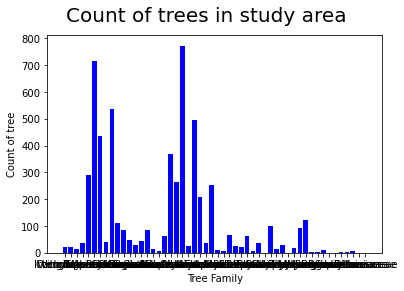

In [6]:
plt.bar(['Irvingiaceae',
'Vochysiaceae',
'Humiriaceae',
'Ctenolophonaceae',
'Fabaceae',
'Burseraceae',
'Myristicaceae',
'Apocynaceae',
'Rubiaceae',
'Clusiaceae',
'Olacaceae',
'Malvaceae',
'Lamiaceae',
'Sapotaceae',
'Phyllanthaceae',
'Chrysobalanaceae',
'Combretaceae',
'Salicaceae',
'Annonaceae',
'Anacardiaceae',
'Euphorbiaceae',
'Myrtaceae',
'Gentianaceae',
'Urticaceae',
'Lecythidaceae',
'Ebenaceae',
'Anisophylleaceae',
'Achariaceae',
'Meliaceae',
'Lauraceae',
'Simaroubaceae',
'Rutaceae',
'Rhizophoraceae',
'Rhamnaceae',
'Pandaceae',
'Putranjivaceae',
'Erythroxylaceae',
'Passifloraceae',
'Calophyllaceae',
'Ochnaceae',
'Melastomataceae',
'Hypericaceae',
'Moraceae',
'Asparagaceae',
'Ixonanthaceae',
'Peridiscaceae',
'Bignoniaceae',
'Jungermanniaceae',
'Sapindaceae',
'Brachytheciaceae',
'Vitaceae',
'Dilleniaceae',

],[N1,
N2,
N3,
N4,
N5,
N6,
N7,
N8,
N9,
N10,
N11,
N12,
N13,
N14,
N15,
N16,
N17,
N18,
N19,
N20,
N21,
N22,
N23,
N24,
N25,
N26,
N27,
N28,
N29,
N30,
N31,
N32,
N33,
N34,
N35,
N36,
N37,
N38,
N39,
N40,
N41,
N42,
N43,
N44,
N45,
N46,
N47,
N48,
N49,
N50,
N51,
N52
],  color="blue")
plt.ylabel('Count of tree')
plt.xlabel('Tree Family')
plt.suptitle('Count of trees in study area ', fontsize=20) 

In [7]:
# Goal 

# Biomass index 

What is the biomass index?

In [11]:
#Libs
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
import sys
from scipy.interpolate import make_interp_spline, BSpline
from scipy import misc
from scipy.ndimage import gaussian_filter

##Import
#L2 is the processed product
L2 =pd.read_csv(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\LVIS2_Gabon2016_0308_R1808_045612.csv')

#L1 is the waveform product- the 'r' is for reading
lvis = h5py.File(r'D:\Gabon_Lidar\DATA\LEVEL1_0308\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')


#Reading get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = 1024
wfsize = 1023


#With it read in next part is to read on of the shots - THis is where the loop needs to be.
myshotnum = int(9421462)

#The bumps the selected shot again the shot list
wave_idx = np.where(all_shotnums==myshotnum)[0][0]

#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]

#This extracting the Z0
Z0 = int(lvis['Z0'][wave_idx])

#This extracting the Z1023
Z1023 = int(lvis['Z1023'][wave_idx])

#Check if this does anything
x = Z0 - Z1023

#This brings in the L2 Product
L2 = L2[(L2['SHOTNUMBER'] == myshotnum)]

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))


In [13]:
zstretch.shape

(1024,)

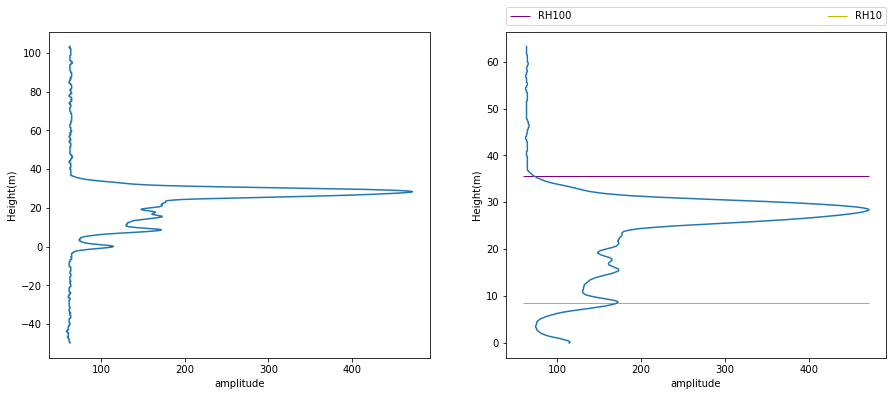

In [8]:
#Libs
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
import sys
from scipy.interpolate import make_interp_spline, BSpline
from scipy import misc
from scipy.ndimage import gaussian_filter

##Import
#L2 is the processed product
L2 =pd.read_csv(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\LVIS2_Gabon2016_0308_R1808_045612.csv')

#L1 is the waveform product- the 'r' is for reading
lvis = h5py.File(r'D:\Gabon_Lidar\DATA\LEVEL1_0308\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')


#Reading get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = 1024
wfsize = 1023


#With it read in next part is to read on of the shots - THis is where the loop needs to be.
myshotnum = int(9421462)

#The bumps the selected shot again the shot list
wave_idx = np.where(all_shotnums==myshotnum)[0][0]

#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]

#This extracting the Z0
Z0 = int(lvis['Z0'][wave_idx])

#This extracting the Z1023
Z1023 = int(lvis['Z1023'][wave_idx])

#Check if this does anything
x = Z0 - Z1023

#This brings in the L2 Product
L2 = L2[(L2['SHOTNUMBER'] == myshotnum)]

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

#Converting fields to Floats
ZG = float(L2['ZG'])
ZT = float(L2['ZT'])
RH25 = float(L2['RH25'])
RH50 = float(L2['RH50'])
RH75 = float(L2['RH75'])
RH10 = float(L2['RH10'])
RH100 = float(L2['RH100'])

#Smooth
waveform = gaussian_filter(waveform, sigma=3)

# set the z range limits for plotting the waveform to crop the noise
zmin = RH10 - (ZT - RH10) / 6  # sets zmin at 15% below the waveform range defined in RH10-ZT
zmax = ZT + (ZT - RH10) / 18  # sets zmax at 5% above the waveform range defined in RH10-ZT

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

#This subtract with the ground height normalizing everything
zstretch = zstretch - ZG


# crop the waveform and elevation arrays to the z range limits
x = zstretch >= zmin  # this returns boolean True/False based on the comparison condition statement
y = zstretch <= zmax
z = (x == y)  # this creates a combined boolean result from the previous two condition statements
waveform_crop = []
zstretch_crop = []
for i in range(0, len(waveform)):
    if z[i] == True:
        waveform_crop.append(waveform[i])
        zstretch_crop.append(zstretch[i])

#Chart 1
fig = plt.figure(figsize=(15, 6))
figplot = fig.add_subplot(121)
figplot.plot(waveform,zstretch)
plt.ylabel('Height(m)')
plt.xlabel('amplitude')

#Chart 2
figplot = fig.add_subplot(122)
figplot.plot(waveform_crop,zstretch_crop)
#figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
#figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
#figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
#figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
figplot.hlines(RH100,min(waveform),max(waveform),lw=1,linestyle='-', color='purple',label='RH100')
figplot.hlines(RH10,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH10')
#figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel('Height(m)')
plt.xlabel('amplitude')
plt.show(block=False)

In [9]:
#Libs
import matplotlib.pyplot as plt
import h5py
from geopandas.geoseries import *
from scipy.ndimage import gaussian_filter

##Import


#L2 is the processed product
L2 =pd.read_csv(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\LVIS2_Gabon2016_0308_R1808_045612.csv')

#L1 is the waveform product- the 'r' is for reading
lvis = h5py.File(r'D:\Gabon_Lidar\DATA\LEVEL1_0308\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')


#Reading get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = 1024
wfsize = 1023


#With it read in next part is to read on of the shots - THis is where the loop needs to be.
myshotnum = int(9911426)


#The bumps the selected shot again the shot list
wave_idx = np.where(all_shotnums==myshotnum)[0][0]

#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]

#This extracting the Z0
Z0 = int(lvis['Z0'][wave_idx])

#This extracting the Z1023
Z1023 = int(lvis['Z1023'][wave_idx])

#Check if this does anything
x = Z0 - Z1023

#This brings in the L2 Product
L2 = L2[(L2['SHOTNUMBER'] == myshotnum)]

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

#Converting fields to Floats
ZG = float(L2['ZG'])
ZT = float(L2['ZT'])
RH25 = float(L2['RH25'])
RH50 = float(L2['RH50'])
RH75 = float(L2['RH75'])
RH10 = float(L2['RH10'])
RH100 = float(L2['RH100'])

#Smooth
waveform = gaussian_filter(waveform, sigma=3)

# set the z range limits for plotting the waveform to crop the noise
#Remove 122320
#zmin = RH10 - (ZT - RH10) / 6  # sets zmin at 15% below the waveform range defined in RH10-ZT
#zmax = ZT + (ZT - RH10) / 18  # sets zmax at 5% above the waveform range defined in RH10-ZT

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

#This subtract with the ground height normalizing everything
zstretch = zstretch - ZG


# crop the waveform and elevation arrays to the z range limits
x = zstretch #>= zmin  # this returns boolean True/False based on the comparison condition statement
y = zstretch #<= zmax
z = (x == y)  # this creates a combined boolean result from the previous two condition statements
waveform_crop = []
zstretch_crop = []
for i in range(0, len(waveform)):
    if z[i] == True:
        waveform_crop.append(waveform[i])
        zstretch_crop.append(zstretch[i])




SIGMEAN = np.array(lvis['SIGMEAN'][wave_idx])

cal_wave = np.subtract(waveform , SIGMEAN)
#Look up what reshape does - 020921
cal_wave = cal_wave.reshape(cal_wave.size,1)

X = np.arange(1024)
X = X.reshape(X.size,1)

#elevation
wz = X*((Z1023 - Z0)/1024) +Z0
#Height
wz = np.subtract(wz, ZG)

filter_arr = np.logical_and(-10 < wz, wz < RH100)

ind = wz[filter_arr]

wz = wz[filter_arr]

#Should be a table of 1000
bio = 0
sub_wz = wz # -
sub_cal_wave = cal_wave[filter_arr] # -
sum_count = np.sum(sub_cal_wave) #
iii=0

#that reads everything
for iii , elements in  enumerate(sub_cal_wave):
    #print(bio)
    #print(iii)
    #print(iii+1)
    #print(sub_cal_wave[iii]/sum_count)
    #dp[iii] = (sub_cal_wave[iii]/sum_count)
    if (sub_wz[iii] > - 10) and (sub_wz[iii] < 0) :
        bio = bio + sub_wz[iii] * sub_wz[iii] * (sub_cal_wave[iii]/sum_count) * (-1.0)
    else:
        bio = bio + sub_wz[iii] * sub_wz[iii] * (sub_cal_wave[iii]/sum_count)
        #print('This is the bio')
        #print(bio)
        #print(myshotnum)


        
print(bio)
print(myshotnum)

from csv import writer
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)


#row_contents = [myshotnum, bio]
#append_list_as_row(r'D:\Gabon_Lidar\DATA\pandas_csv\bio.csv', row_contents)

3.379251916929527
9911426


In [10]:
# change working directory 
os.chdir(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\")
os.getcwd()

SyntaxError: EOL while scanning string literal (<ipython-input-10-463da4c15ed4>, line 2)

In [ ]:
# Calculate abgd at the Footprint Level 

In [ ]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [ ]:
#Shot level 

In [ ]:
def calc_agbd_footprint(laser_range):
    """
    input: laser_range - int
    output: L2 with extra column 'agbd'
    """
    #getting data
    datadir = r'D:/Gabon_Lidar/DATA/email_122620/'
    lasershot= pd.read_csv(datadir+'L2_Shot_List.csv',usecols=['SHOTNUMBER'])
    L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
    L2 = L2all.loc[L2all['SHOTNUMBER'].isin(lasershot['SHOTNUMBER'].tolist())]
    tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

    #looping through each lasershot
    agbs = []

    for i in range(len(L2)):
        las_x = L2.iloc[i]['X']
        las_y = L2.iloc[i]['Y']
        agbs.append(tree['m_agb'][(tree.x-las_x)**2+(tree.y-las_y)**2 <= laser_range**2].sum()/(np.pi*laser_range**2))
    
    #set new column in L2 dataframe to this new list of calculated agbs
    L2['agbd'] = agbs
    return L2

In [ ]:
L2_tosave = calc_agbd_footprint(12.5)

In [ ]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

In [ ]:
L2_tosave.to_csv('L2_w_agbd_ShotLevel.csv')

# Start Here 

Calculating at the foot print, 0625 hec, 025 hec and hector level. 

In [54]:
# Import necessary packages
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py

import seaborn as sns
import statsmodels.api as sm
import pandas as pd 
import numpy as np 
#Stats 
from sklearn import linear_model 
from scipy.stats import spearmanr
from scipy.stats import sem

In [55]:

datadir = r'D:/Gabon_Lidar/DATA/email_122620/'

tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

### Bring in the DATA

In [56]:
footprint = pd.read_csv(datadir+'LVIS2_withPlots.csv')#mass of above-ground components of tree (kg) 
footprint.to_csv(datadir +'footprint.csv')
tree = pd.read_csv(datadir+'Mondah_Tree_Data.csv')

In [57]:
tree


,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,y,status,allom_key,a_stem,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,60938.5731,1,2,3.092,34.0,49.06,1.984,1,1.6,59044.31
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,60940.9055,1,2,1.732,-9999.0,42.50,1.485,1,3.6,27862.05
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,63758.0291,1,2,1.148,-9999.0,38.39,1.209,1,2.0,25276.37
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,63353.7130,1,2,1.148,-9999.0,38.39,1.209,1,2.1,22006.20
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,64740.9104,1,2,1.082,-9999.0,37.83,1.174,1,1.6,20453.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,NaN,NaN,NASA22,14,2/19/2016 0:00,NaN,NaN,0.534143,8232,1,...,-9999.0000,1,2,-9999.000,0.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00
6688,NaN,NaN,NASA23,12,2/1/2016 0:00,NaN,NaN,0.534143,102614,1,...,-9999.0000,1,-9999,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00
6689,NaN,NaN,NASA23,13,2/1/2016 0:00,NaN,NaN,0.534143,102615,1,...,-9999.0000,1,-9999,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00
6690,NaN,NaN,NASA23,15,2/1/2016 0:00,NaN,NaN,0.534143,102619,1,...,-9999.0000,1,-9999,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00


### Organize Plot data for trees 

In [58]:
#Creating the .25 hec plots 
tree.loc[(tree['subplot'] == 1)|(tree['subplot'] == 2)| (tree['subplot'] == 7)| (tree['subplot'] == 8), 'subplot25'] = '1.2'
tree.loc[(tree['subplot'] == 4)|(tree['subplot'] == 5)| (tree['subplot'] == 3)| (tree['subplot'] == 6), 'subplot25'] = '1.1'
tree.loc[(tree['subplot'] == 12)|(tree['subplot'] == 13)| (tree['subplot'] == 11)| (tree['subplot'] == 14), 'subplot25'] = '2.1'
tree.loc[(tree['subplot'] == 9)|(tree['subplot'] == 10)| (tree['subplot'] == 15)| (tree['subplot'] == 16), 'subplot25'] = '2.2'
#Create unqure id for subplot25 and 0625 
tree['ID_subplot25'] = tree['plot'] + tree['subplot25']

tree['subplot_0625'] =  tree['subplot']
tree['subplot_0625'] =  tree['subplot'].astype(int)

In [59]:
tree

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,a_stem,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,3.092,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,1.732,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,1.148,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,1.148,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,1.082,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,NaN,NaN,NASA22,14,2/19/2016 0:00,NaN,NaN,0.534143,8232,1,...,-9999.000,0.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA222.1,14
6688,NaN,NaN,NASA23,12,2/1/2016 0:00,NaN,NaN,0.534143,102614,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA232.1,12
6689,NaN,NaN,NASA23,13,2/1/2016 0:00,NaN,NaN,0.534143,102615,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA232.1,13
6690,NaN,NaN,NASA23,15,2/1/2016 0:00,NaN,NaN,0.534143,102619,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.2,NASA232.2,15


In [60]:
tree['subplot_0625'] =  tree['subplot']*10

In [61]:
tree

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,a_stem,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,3.092,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,100
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,1.732,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,150
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,1.148,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,110
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,1.148,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,60
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,1.082,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,NaN,NaN,NASA22,14,2/19/2016 0:00,NaN,NaN,0.534143,8232,1,...,-9999.000,0.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA222.1,140
6688,NaN,NaN,NASA23,12,2/1/2016 0:00,NaN,NaN,0.534143,102614,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA232.1,120
6689,NaN,NaN,NASA23,13,2/1/2016 0:00,NaN,NaN,0.534143,102615,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.1,NASA232.1,130
6690,NaN,NaN,NASA23,15,2/1/2016 0:00,NaN,NaN,0.534143,102619,1,...,-9999.000,-9999.0,-9999.00,-9999.000,-9999,-9999.0,-9999.00,2.2,NASA232.2,150


In [62]:
tree['subplot_0625'] =  tree['subplot'].astype(str)
tree['ID_subplot_0625'] = tree['plot'] + tree['subplot_0625']
#Filter for -9999
tree = tree[(tree.m_agb >= 0)]
#Create subplot tables 
tree_plot = tree 
tree_plot25 = tree 
tree_plot625 = tree

In [65]:
tree_plot25

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6,NASA206
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12,NASA2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,NaN,NaN,NASA21,4,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101878,1,...,-9999.0,7.93,0.050,1,1.3,3.89,1.1,NASA211.1,4,NASA214
6641,NaN,NaN,NASA21,9,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101889,1,...,-9999.0,7.93,0.050,1,1.3,3.89,2.2,NASA212.2,9,NASA219
6642,NaN,NaN,NASA14,12,2/1/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101397,1,...,-9999.0,8.16,0.053,1,1.3,3.40,2.1,NASA142.1,12,NASA1412
6643,NaN,NaN,NASA20,1,2/12/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101605,1,...,-9999.0,7.93,0.050,1,1.3,2.95,1.2,NASA201.2,1,NASA201


In [63]:
tree

,OID_,OID1,plot,subplot,tree_date,family,species,wsg,tree,stem,...,h_t,h_t_mod,d_stem,d_stem_val,d_ht,m_agb,subplot25,ID_subplot25,subplot_0625,ID_subplot_0625
0,NaN,NaN,NASA02,10,2/5/2016 0:00,Irvingiaceae,Klainedoxa sp.,0.917792,6808,1,...,34.0,49.06,1.984,1,1.6,59044.31,2.2,NASA022.2,10,NASA0210
1,NaN,NaN,NASA02,15,2/5/2016 0:00,Vochysiaceae,Erismadelphus exsul,0.607100,6981,1,...,-9999.0,42.50,1.485,1,3.6,27862.05,2.2,NASA022.2,15,NASA0215
2,NaN,NaN,NASA13,11,2/4/2016 0:00,Irvingiaceae,Klainedoxa trillesii,0.917792,5276,1,...,-9999.0,38.39,1.209,1,2.0,25276.37,2.1,NASA132.1,11,NASA1311
3,NaN,NaN,NASA20,6,2/12/2016 0:00,Humiriaceae,Sacoglottis gabonensis,0.796333,4154,1,...,-9999.0,38.39,1.209,1,2.1,22006.20,1.1,NASA201.1,6,NASA206
4,NaN,NaN,NASA22,12,2/19/2016 0:00,Ctenolophonaceae,Ctenolophon englerianus,0.795000,8152,1,...,-9999.0,37.83,1.174,1,1.6,20453.35,2.1,NASA222.1,12,NASA2212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,NaN,NaN,NASA21,4,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101878,1,...,-9999.0,7.93,0.050,1,1.3,3.89,1.1,NASA211.1,4,NASA214
6641,NaN,NaN,NASA21,9,2/24/2016 0:00,Annonaceae,Cleistopholis sp.,0.322350,101889,1,...,-9999.0,7.93,0.050,1,1.3,3.89,2.2,NASA212.2,9,NASA219
6642,NaN,NaN,NASA14,12,2/1/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101397,1,...,-9999.0,8.16,0.053,1,1.3,3.40,2.1,NASA142.1,12,NASA1412
6643,NaN,NaN,NASA20,1,2/12/2016 0:00,Urticaceae,Musanga cecropioides,0.242833,101605,1,...,-9999.0,7.93,0.050,1,1.3,2.95,1.2,NASA201.2,1,NASA201


### Organize Plot data for LIDAR

 # Field data 

In [112]:
sumstep = ['ID_subplot_0625', 'm_agb']
trees_plot625_sum= tree_plot625[sumstep]
trees_plot625= trees_plot625_sum.groupby(by='ID_subplot_0625').sum()/(10**3 *.0625)


In [163]:
trees_plot625

,m_agb
ID_subplot_0625,
NASA011,6.27296
NASA0110,112.30640
NASA0111,38.00720
NASA0112,2.61888
NASA0113,128.80912
...,...
NASA235,32.62048
NASA236,93.83648
NASA237,232.86944


In [113]:
sumstep = ['ID_subplot25', 'm_agb']
trees_plot25_sum= tree_plot25[sumstep]
trees_plot25= trees_plot25_sum.groupby(by='ID_subplot25').sum()/(10**3 *.25)

In [114]:
sumstep = ['plot', 'm_agb']
trees_plot_sum= tree_plot[sumstep]
trees_plot= trees_plot_sum.groupby(by='plot').sum()/(10**3 )

In [117]:
#LIDAR 

In [126]:
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')

In [127]:
L2all

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,1.0,1.0,547015.0,64416.0,NASA14,13.0,2.1,181.659256,3.958614
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,1.0,1.0,547015.0,64406.0,NASA14,13.0,2.1,94.802843,3.390362
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,1.0,1.0,547014.0,64364.0,NASA14,15.0,2.2,43.625253,4.444115
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,1.0,1.0,547014.0,64353.0,NASA14,15.0,2.2,18.686456,3.799265
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,2.0,2.0,1.0,547013.0,64343.0,NASA14,16.0,2.2,-0.139962,0.810697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,1.0,1.0,536752.0,60405.0,NASA09,14.0,2.1,-0.784101,0.055269
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,1.0,1.0,536752.0,60384.0,NASA09,14.0,2.1,2.095619,0.118646
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,1.0,1.0,536752.0,60374.0,NASA09,15.0,2.2,-0.887688,NaN
643,644.0,1.0,644.0,1.0,644.0,1.657455e+09,9911426.0,46228.817,9.330297,0.546119,...,1.0,1.0,1.0,536752.0,60364.0,NASA09,15.0,2.2,3.357730,NaN


In [123]:
L2all = pd.read_csv(datadir+'LVIS2_withPlots.csv')
#Create unqure id for subplot25 and 0625 
L2all['subplot025'] =   L2all['subplot025'].astype(str)
L2all['ID_subplot25'] =L2all['plot'] + L2all['subplot025']

L2all = L2all[(L2all.subplot625 >= 0)]
L2all['subplot625'] =   L2all['subplot625'].astype(int)

In [128]:
L2all['subplot625'] =   L2all['subplot625'].astype(str)
L2all['ID_subplot625'] = L2all['plot'] + L2all['subplot625']


# remove special character 
L2all.ID_subplot625 = L2all.ID_subplot625.str.replace('.', '') 
#Create subplot tables
L2_All_footprint = L2all
L2all_plot = L2all
L2all_plot25 = L2all 
L2all_plot625 = L2all

In [ ]:
L2_All_footprint

In [125]:
L2all

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot25,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,547015.0,64416.0,NASA14,13,2.1,181.659256,3.958614,NASA142.1,NASA1413
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,547015.0,64406.0,NASA14,13,2.1,94.802843,3.390362,NASA142.1,NASA1413
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,547014.0,64364.0,NASA14,15,2.2,43.625253,4.444115,NASA142.2,NASA1415
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,547014.0,64353.0,NASA14,15,2.2,18.686456,3.799265,NASA142.2,NASA1415
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,1.0,547013.0,64343.0,NASA14,16,2.2,-0.139962,0.810697,NASA142.2,NASA1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,640.0,1.0,640.0,1.0,640.0,1.657455e+09,9911421.0,46228.812,9.330292,0.546591,...,1.0,536752.0,60416.0,NASA09,13,2.1,1.878062,0.061014,NASA092.1,NASA0913
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,536752.0,60405.0,NASA09,14,2.1,-0.784101,0.055269,NASA092.1,NASA0914
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,536752.0,60384.0,NASA09,14,2.1,2.095619,0.118646,NASA092.1,NASA0914
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,536752.0,60374.0,NASA09,15,2.2,-0.887688,NaN,NASA092.2,NASA0915


In [129]:
L2_All_footprint

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_ZG,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,1.0,547015.0,64416.0,NASA14,13.0,2.1,181.659256,3.958614,NASA14130
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,1.0,547015.0,64406.0,NASA14,13.0,2.1,94.802843,3.390362,NASA14130
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,1.0,547014.0,64364.0,NASA14,15.0,2.2,43.625253,4.444115,NASA14150
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,1.0,547014.0,64353.0,NASA14,15.0,2.2,18.686456,3.799265,NASA14150
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,2.0,1.0,547013.0,64343.0,NASA14,16.0,2.2,-0.139962,0.810697,NASA14160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,1.0,536752.0,60405.0,NASA09,14.0,2.1,-0.784101,0.055269,NASA09140
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,1.0,536752.0,60384.0,NASA09,14.0,2.1,2.095619,0.118646,NASA09140
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,1.0,536752.0,60374.0,NASA09,15.0,2.2,-0.887688,NaN,NASA09150
643,644.0,1.0,644.0,1.0,644.0,1.657455e+09,9911426.0,46228.817,9.330297,0.546119,...,1.0,1.0,536752.0,60364.0,NASA09,15.0,2.2,3.357730,NaN,NASA09150


###  LIDAR Process 

In [131]:
L2_All_footprint.columns


Index(['OID_', 'Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'LFID', 'SHOTNUMBER', 'TIME', 'GLON', 'GLAT', 'ZG', 'HLON', 'HLAT',
       'ZH', 'TLON', 'TLAT', 'ZT', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100',
       'AZIMUTH', 'INCIDENTANGLE', 'RANGE', 'COMPLEXITY', 'CHANNEL_L1B',
       'CHANNEL_ZG', 'CHANNEL_RH', 'X', 'Y', 'plot', 'subplot625',
       'subplot025', 'bio_mass_index', 'agbd', 'ID_subplot625'],
      dtype='object')

In [132]:
sub_set = ['SHOTNUMBER', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd','ID_subplot625', 'plot','subplot025']
L2_All_footprint = L2_All_footprint[sub_set]
L2_All_footprint= L2_All_footprint


In [133]:
L2_All_footprint

,SHOTNUMBER,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,ID_subplot625,plot,subplot025
0,9361768.0,5.46,7.34,8.53,9.43,10.11,10.70,11.30,11.98,12.73,...,19.84,20.14,20.51,21.03,22.08,181.659256,3.958614,NASA14130,NASA14,2.1
1,9361769.0,3.60,5.39,6.37,7.04,7.57,8.09,8.61,9.06,9.51,...,14.23,14.68,15.43,16.62,19.24,94.802843,3.390362,NASA14130,NASA14,2.1
2,9361773.0,-1.28,-0.83,-0.45,-0.08,0.30,0.67,1.12,1.79,2.77,...,14.90,16.10,17.59,19.02,20.96,43.625253,4.444115,NASA14150,NASA14,2.2
3,9361774.0,-1.42,-1.05,-0.75,-0.52,-0.30,-0.08,0.15,0.37,0.60,...,10.33,10.86,11.53,12.88,15.20,18.686456,3.799265,NASA14150,NASA14,2.2
4,9361775.0,-1.09,-0.87,-0.64,-0.49,-0.27,-0.12,0.11,0.26,0.48,...,11.04,17.33,20.25,23.02,25.35,-0.139962,0.810697,NASA14160,NASA14,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,9911422.0,-2.10,-1.65,-1.35,-1.05,-0.83,-0.60,-0.38,-0.23,0.00,...,3.67,4.34,5.39,7.19,9.28,-0.784101,0.055269,NASA09140,NASA09,2.1
641,9911424.0,-3.59,-2.99,-2.55,-2.10,-1.72,-1.42,-1.05,-0.75,-0.52,...,3.44,3.89,4.57,5.76,8.23,2.095619,0.118646,NASA09140,NASA09,2.1
642,9911425.0,-1.72,-1.27,-0.97,-0.68,-0.45,-0.23,0.00,0.22,0.52,...,5.16,5.54,6.06,6.66,7.93,-0.887688,NaN,NASA09150,NASA09,2.2
643,9911426.0,-1.94,-1.42,-1.05,-0.67,-0.37,-0.07,0.23,0.53,0.83,...,4.87,5.24,5.77,6.59,8.46,3.357730,NaN,NASA09150,NASA09,2.2


<AxesSubplot:xlabel='RH50', ylabel='bio_mass_index'>

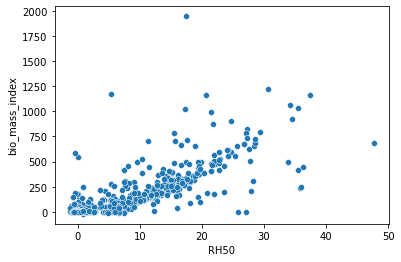

<AxesSubplot:xlabel='bio_mass_index', ylabel='agbd'>

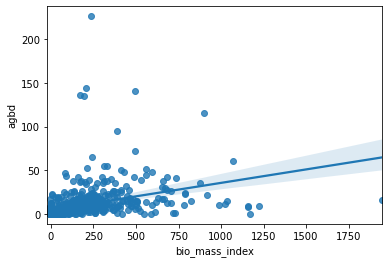

In [140]:
sns.regplot(data=L2_All_footprint, x="bio_mass_index", y="agbd")

<AxesSubplot:xlabel='RH50', ylabel='agbd'>

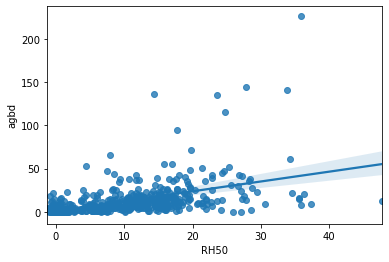

In [139]:
sns.regplot(data=L2_All_footprint, x="RH50", y="agbd")

<AxesSubplot:xlabel='RH50', ylabel='bio_mass_index'>

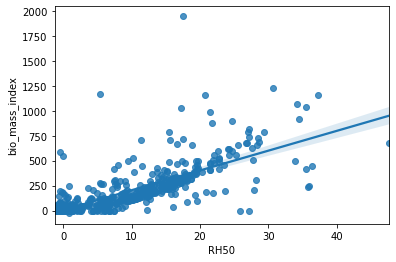

In [141]:
sns.regplot(data=L2_All_footprint, x="RH50", y="bio_mass_index")

In [147]:
# I need to make a plot of this 022321
L2_All_footprint = L2_All_footprint.dropna()
df = L2_All_footprint

reg = linear_model.LinearRegression()
reg.fit(df[['RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45',
       'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90',
       'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']],df.agbd)
reg.coef_
reg.intercept_

-2.9532592353514655

In [148]:
reg.coef_

array([-1.39771376e+00,  1.68251735e+00,  1.27875227e+00, -2.94134473e+00,
        6.89463495e+00, -8.14662890e+00, -4.38320371e+00,  1.21964297e+01,
       -8.98424247e+00,  9.34040007e+00, -3.98974398e+00, -2.61636585e+00,
        1.85637724e+00,  4.36319192e-03,  5.41138835e-01, -8.27690268e-01,
       -3.52293835e-01,  7.35590546e-01,  2.59343694e-01,  9.52222893e-02,
       -9.65184457e-01,  5.89472718e-01,  1.46209186e-01])

In [144]:
L2_All_footprint = L2_All_footprint.dropna()
df = L2_All_footprint

reg = linear_model.LinearRegression()
reg.fit(df[['RH10', 'RH15', 'RH20', 'RH25', 'RH30', 'RH35', 'RH40', 'RH45',
       'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75', 'RH80', 'RH85', 'RH90',
       'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']],df.bio_mass_index)
reg.coef_
reg.intercept_

-32.646569408376706

In [145]:
reg.coef_

array([-33.38257569,  67.3343523 , -28.99212792,  11.3549582 ,
       -61.90693208,  86.1683937 , -41.54236841,  -4.13389981,
        29.69075098, -56.43197886,  90.5247162 , -59.67124222,
       -14.53430869,  38.18665042, -10.97855302,  12.75859295,
        -4.89842731,  26.51918179, -54.70560827,  26.09347998,
         5.90296118,  -5.38561374,   0.98811435])

In [146]:
reg.intercept_

-32.646569408376706

In [ ]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
sumstep = ['plot', 'm_agb']
trees_plot_sum= tree_plot[sumstep]
trees_plot= trees_plot_sum.groupby(by='plot').sum()/(10**3 )

In [149]:
L2all_plot625_sum.head()

,ID_subplot625,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA011,-1.12,1.86,4.19,6.05,7.70,9.19,10.54,11.66,12.71,...,19.29,20.56,22.57,23.18,23.92,24.89,26.31,30.05,1586.154130,0.313258
1,NASA0116,-3.20,-2.23,-1.48,-0.81,-0.07,0.53,1.20,2.03,2.85,...,11.89,15.18,19.97,22.29,24.38,26.39,28.86,32.14,0.548619,8.064638
2,NASA018,-3.06,-2.02,-1.20,-0.31,0.67,1.86,3.21,4.79,6.43,...,13.75,15.02,16.75,17.27,18.01,18.91,20.49,23.29,94.544525,0.444432
3,NASA019,-5.60,-4.64,-3.81,-3.07,-2.39,-1.87,-1.34,-0.82,-0.30,...,4.18,5.31,7.32,8.00,8.90,10.31,12.93,18.29,69.519013,0.413446
4,NASA021,-26.96,-19.69,-14.15,-9.50,-5.39,-1.93,1.44,4.89,8.41,...,43.40,53.15,71.27,80.41,91.27,99.88,110.38,126.05,3.426855,65.030496


In [160]:
#RA - Do this for each of the plots 
#filter out unneeded columns#Remove Agbd 
L2_All_625 = L2_All_footprint.groupby(by='ID_subplot625').mean()

D_subplot_0625	
NASA011	6.27296
NASA0110	112.30640
NASA0111	38.00720
NASA0112	2.61888
NASA0113	128.80912
...	...
NASA235	32.62048
NASA236	93.83648
NASA237	232.86944
NASA238	325.00960
NASA239	54.46320

In [162]:
L2_All_625

,SHOTNUMBER,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,subplot025
ID_subplot625,,,,,,,,,,,,,,,,,,,,,
NASA0110,9902931.5,-0.560000,0.930000,2.095000,3.025000,3.850000,4.595000,5.270000,5.830000,6.35500,...,10.280000,11.285000,11.590000,11.960000,12.445000,13.155000,15.025000,793.077065,0.156629,1.2
NASA01160,9903715.5,-1.600000,-1.115000,-0.740000,-0.405000,-0.035000,0.265000,0.600000,1.015000,1.42500,...,7.590000,9.985000,11.145000,12.190000,13.195000,14.430000,16.070000,0.274309,4.032319,2.2
NASA0180,9903155.5,-1.530000,-1.010000,-0.600000,-0.155000,0.335000,0.930000,1.605000,2.395000,3.21500,...,7.510000,8.375000,8.635000,9.005000,9.455000,10.245000,11.645000,47.272262,0.222216,1.2
NASA0190,9903417.0,-1.866667,-1.546667,-1.270000,-1.023333,-0.796667,-0.623333,-0.446667,-0.273333,-0.10000,...,1.770000,2.440000,2.666667,2.966667,3.436667,4.310000,6.096667,23.173004,0.137815,2.2
NASA0210,9898937.5,-3.370000,-2.461250,-1.768750,-1.187500,-0.673750,-0.241250,0.180000,0.611250,1.05125,...,6.643750,8.908750,10.051250,11.408750,12.485000,13.797500,15.756250,0.428357,8.128812,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NASA2350,9896659.5,-0.861667,0.083333,0.860000,1.733333,2.870000,4.190000,5.475000,6.756667,8.13000,...,19.095000,20.940000,21.426667,22.298333,23.670000,24.816667,26.736667,150.561552,4.059288,1.1
NASA2360,9896659.5,5.162500,6.827500,8.080000,9.145000,10.100000,10.940000,11.707500,12.512500,13.15000,...,20.180000,21.755000,22.147500,22.592500,23.175000,24.205000,26.972500,204.175840,9.106087,1.1
NASA2370,9896659.5,1.295000,3.253333,5.121667,6.706667,8.165000,9.698333,11.068333,12.206667,13.19000,...,24.933333,26.688333,27.140000,27.661667,28.475000,29.483333,31.615000,265.905751,22.210316,1.2


### Subplot_625  Join 

In [25]:
subplot625 = L2all_plot625_sum.set_index('ID_subplot625').join(trees_plot625_sum.set_index('ID_subplot_0625'))

In [26]:
#subplot625
subplot625.to_csv(datadir +'subplot625.csv')
subplot625 =pd.read_csv(datadir +'subplot625.csv')
#take the mean value of RHvalues 

In [27]:
subplot625

,ID_subplot625,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb,agb_megagram,agb_megagram_hec
0,NASA011,-1.12,1.86,4.19,6.05,7.70,9.19,10.54,11.66,12.71,...,23.18,23.92,24.89,26.31,30.05,1586.154130,0.313258,392.06,0.000392,0.006273
1,NASA0116,-3.20,-2.23,-1.48,-0.81,-0.07,0.53,1.20,2.03,2.85,...,22.29,24.38,26.39,28.86,32.14,0.548619,8.064638,638.09,0.000638,0.010209
2,NASA018,-3.06,-2.02,-1.20,-0.31,0.67,1.86,3.21,4.79,6.43,...,17.27,18.01,18.91,20.49,23.29,94.544525,0.444432,231.65,0.000232,0.003706
3,NASA019,-5.60,-4.64,-3.81,-3.07,-2.39,-1.87,-1.34,-0.82,-0.30,...,8.00,8.90,10.31,12.93,18.29,69.519013,0.413446,30.07,0.000030,0.000481
4,NASA021,-26.96,-19.69,-14.15,-9.50,-5.39,-1.93,1.44,4.89,8.41,...,80.41,91.27,99.88,110.38,126.05,3.426855,65.030496,4655.85,0.004656,0.074494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,NASA235,-5.17,0.50,5.16,10.40,17.22,25.14,32.85,40.54,48.78,...,128.56,133.79,142.02,148.90,160.42,903.369313,24.355728,2038.78,0.002039,0.032620
138,NASA236,20.65,27.31,32.32,36.58,40.40,43.76,46.83,50.05,52.60,...,88.59,90.37,92.70,96.82,107.89,816.703359,36.424348,5864.78,0.005865,0.093836
139,NASA237,7.77,19.52,30.73,40.24,48.99,58.19,66.41,73.24,79.14,...,162.84,165.97,170.85,176.90,189.69,1595.434509,133.261896,14554.34,0.014554,0.232869
140,NASA238,17.42,29.62,40.10,50.41,60.58,68.29,73.59,78.07,82.71,...,132.51,134.46,136.78,139.77,146.21,1896.149631,62.026384,20313.10,0.020313,0.325010


<AxesSubplot:xlabel='bio_mass_index', ylabel='agb_megagram_hec'>

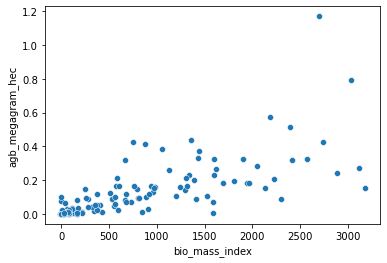

In [28]:
sns.scatterplot(data=subplot625, x="bio_mass_index", y="agb_megagram_hec")

### Subplot_0625 Stats 

In [29]:
subplot625.corr()

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb,agb_megagram,agb_megagram_hec
RH10,1.000000,0.991345,0.977813,0.964771,0.951799,0.938583,0.924013,0.912329,0.901966,0.892296,...,0.759795,0.745400,0.730438,0.715290,0.688524,0.823496,0.745330,0.726453,0.726453,0.726453
RH15,0.991345,1.000000,0.995931,0.988492,0.979279,0.968773,0.955987,0.945542,0.935981,0.927195,...,0.799519,0.785893,0.772026,0.758161,0.733389,0.851328,0.765557,0.729121,0.729121,0.729121
RH20,0.977813,0.995931,1.000000,0.997484,0.991594,0.984309,0.974772,0.965950,0.957464,0.949602,...,0.827233,0.814348,0.801260,0.788191,0.764736,0.866843,0.778203,0.738148,0.738148,0.738148
RH25,0.964771,0.988492,0.997484,1.000000,0.998067,0.993667,0.986482,0.979292,0.971964,0.965090,...,0.848500,0.836109,0.823609,0.811014,0.788229,0.877251,0.785594,0.747709,0.747709,0.747709
RH30,0.951799,0.979279,0.991594,0.998067,1.000000,0.998423,0.993376,0.987943,0.981905,0.975956,...,0.864954,0.852968,0.841001,0.828821,0.806522,0.883678,0.789041,0.754965,0.754965,0.754965
RH35,0.938583,0.968773,0.984309,0.993667,0.998423,1.000000,0.997823,0.994431,0.989892,0.985013,...,0.880327,0.868774,0.857381,0.845637,0.823953,0.890183,0.790652,0.761886,0.761886,0.761886
RH40,0.924013,0.955987,0.974772,0.986482,0.993376,0.997823,1.000000,0.998934,0.995924,0.992004,...,0.895992,0.885248,0.874614,0.863376,0.842334,0.893639,0.795751,0.774310,0.774310,0.774310
RH45,0.912329,0.945542,0.965950,0.979292,0.987943,0.994431,0.998934,1.000000,0.998817,0.996162,...,0.907189,0.896853,0.886761,0.875923,0.855310,0.896667,0.797947,0.780808,0.780808,0.780808
RH50,0.901966,0.935981,0.957464,0.971964,0.981905,0.989892,0.995924,0.998817,1.000000,0.998998,...,0.917101,0.907132,0.897474,0.886935,0.866576,0.900369,0.796270,0.785106,0.785106,0.785106
RH55,0.892296,0.927195,0.949602,0.965090,0.975956,0.985013,0.992004,0.996162,0.998998,1.000000,...,0.928239,0.918846,0.909720,0.899558,0.879702,0.903807,0.793500,0.785266,0.785266,0.785266


In [79]:
sumstep = ['ID_subplot25', 'm_agb']
trees_plot25_sum= tree_plot25[sumstep]
trees_plot25= trees_plot25_sum.groupby(by='ID_subplot25').sum()/(10**3 *.0625)


In [33]:
sum = ['ID_subplot25', 'm_agb']
tree_plot25 = tree_plot25[sum]
trees_plot25_sum =  tree_plot25.groupby(by='ID_subplot25').sum()
trees_plot25_sum['agb_megagram'] =trees_plot25_sum['m_agb']/10**6
trees_plot25_sum['agb_megagram_hec'] = trees_plot25_sum['agb_megagram'] / .25 

In [34]:
trees_plot25_sum.to_csv(datadir +'trees_plot25_sum.csv')
trees_plot25_sum = pd.read_csv(datadir + 'trees_plot25_sum.csv')

### Subplot_25 LIDAR Process 

In [35]:
sum = ['ID_subplot25', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd']
L2all_plot25  = L2all_plot25 [sum]
L2all_plot25_sum = L2all_plot25.groupby(by= 'ID_subplot25').sum()
L2all_plot25_sum.to_csv(datadir +'L2all_plot25_sum.csv')
L2all_plot25_sum =pd.read_csv(datadir +'L2all_plot25_sum.csv')

### Subplot_25  Join 

In [36]:
subplot25 = L2all_plot25_sum.set_index('ID_subplot25').join(trees_plot25_sum.set_index('ID_subplot25'))

In [37]:
#subplot25
subplot25.to_csv(datadir +'subplot25.csv')
subplot25 =pd.read_csv(datadir +'subplot25.csv')

<AxesSubplot:xlabel='bio_mass_index', ylabel='agb_megagram_hec'>

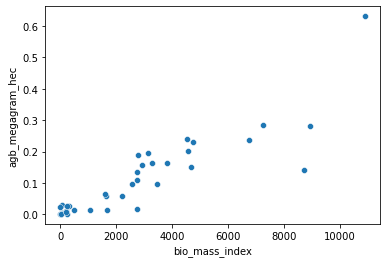

In [38]:
sns.scatterplot(data=subplot25, x="bio_mass_index", y="agb_megagram_hec")

### Subplot_25 Stats 

In [39]:
subplot25.corr()

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb,agb_megagram,agb_megagram_hec
RH10,1.000000,0.992699,0.982779,0.973626,0.965385,0.959004,0.952760,0.946834,0.940819,0.934222,...,0.810850,0.798552,0.785741,0.773329,0.746292,0.864778,0.826362,0.873822,0.873822,0.873822
RH15,0.992699,1.000000,0.997551,0.993257,0.988303,0.983896,0.978918,0.974194,0.969059,0.963676,...,0.854332,0.842782,0.830831,0.819553,0.795189,0.889309,0.843492,0.889802,0.889802,0.889802
RH20,0.982779,0.997551,1.000000,0.998707,0.995753,0.992920,0.989508,0.985929,0.981867,0.977444,...,0.878629,0.867721,0.856278,0.845575,0.823089,0.903327,0.856342,0.900458,0.900458,0.900458
RH25,0.973626,0.993257,0.998707,1.000000,0.999079,0.997529,0.995046,0.992300,0.989009,0.985257,...,0.893323,0.882905,0.872023,0.861814,0.840410,0.911655,0.862560,0.905997,0.905997,0.905997
RH30,0.965385,0.988303,0.995753,0.999079,1.000000,0.999518,0.997766,0.995651,0.992783,0.989427,...,0.902572,0.892553,0.882206,0.872454,0.851863,0.916022,0.867914,0.909211,0.909211,0.909211
RH35,0.959004,0.983896,0.992920,0.997529,0.999518,1.000000,0.999197,0.997807,0.995617,0.992811,...,0.911153,0.901488,0.891537,0.882101,0.862255,0.922102,0.873591,0.913447,0.913447,0.913447
RH40,0.952760,0.978918,0.989508,0.995046,0.997766,0.999197,1.000000,0.999561,0.998124,0.995927,...,0.921796,0.912768,0.903291,0.894251,0.875506,0.929348,0.884142,0.919590,0.919590,0.919590
RH45,0.946834,0.974194,0.985929,0.992300,0.995651,0.997807,0.999561,1.000000,0.999401,0.997899,...,0.929865,0.921261,0.912276,0.903614,0.885393,0.934703,0.889707,0.923593,0.923593,0.923593
RH50,0.940819,0.969059,0.981867,0.989009,0.992783,0.995617,0.998124,0.999401,1.000000,0.999435,...,0.937386,0.929111,0.920496,0.912044,0.894188,0.940497,0.890666,0.926563,0.926563,0.926563
RH55,0.934222,0.963676,0.977444,0.985257,0.989427,0.992811,0.995927,0.997899,0.999435,1.000000,...,0.946211,0.938409,0.930272,0.922108,0.904872,0.944639,0.889364,0.927177,0.927177,0.927177


In [40]:
correlations = subplot25.corr()

<AxesSubplot:>

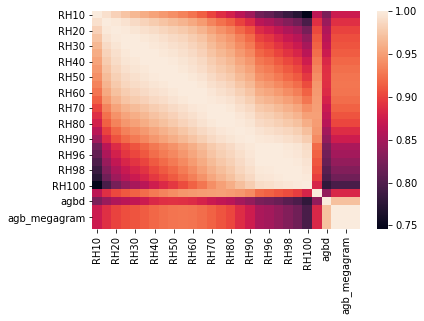

In [41]:
sns.heatmap(correlations)


#### subplot25RH

<AxesSubplot:>

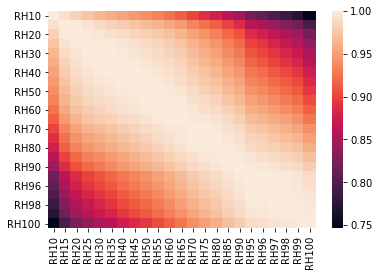

In [42]:
foo = ['ID_subplot25', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']

subplot25RH = subplot25[foo]
correlations = subplot25RH.corr()
sns.heatmap(correlations)

## Plot LEVEL 

### Plot tree Process 

In [43]:
sum = ['plot', 'm_agb']
tree = tree_plot[sum]
trees_plot_sum=  tree.groupby(by='plot').sum()
trees_plot_sum['agb_megagram'] = trees_plot_sum['m_agb']/10**6
trees_plot_sum['agb_megagram_hec'] = trees_plot_sum['agb_megagram'] #make it per hec

In [44]:
trees_plot_sum.to_csv(datadir +'trees_plot_sum.csv')
trees_plot_sum = pd.read_csv(datadir + 'trees_plot_sum.csv')

In [45]:
trees_plot_sum

,plot,m_agb,agb_megagram,agb_megagram_hec
0,NASA01,25867.65,0.025868,0.025868
1,NASA02,268659.24,0.268659,0.268659
2,NASA03,48858.99,0.048859,0.048859
3,NASA05,86507.94,0.086508,0.086508
4,NASA09,3439.58,0.003440,0.003440
5,NASA10,99361.95,0.099362,0.099362
6,NASA11,31446.68,0.031447,0.031447
7,NASA13,230972.28,0.230972,0.230972
8,NASA14,147391.68,0.147392,0.147392
9,NASA19,5256.03,0.005256,0.005256


### Plot LIDAR Process 

In [46]:
L2all_plot

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,LFID,SHOTNUMBER,TIME,GLON,GLAT,...,CHANNEL_RH,X,Y,plot,subplot625,subplot025,bio_mass_index,agbd,ID_subplot25,ID_subplot625
0,1.0,1.0,1.0,1.0,1.0,1.657455e+09,9361768.0,45679.155,9.422531,0.582776,...,1.0,547015.0,64416.0,NASA14,13,2.1,181.659256,3.958614,NASA142.1,NASA1413
1,2.0,1.0,2.0,1.0,2.0,1.657455e+09,9361769.0,45679.156,9.422529,0.582682,...,1.0,547015.0,64406.0,NASA14,13,2.1,94.802843,3.390362,NASA142.1,NASA1413
2,3.0,1.0,3.0,1.0,3.0,1.657455e+09,9361773.0,45679.160,9.422520,0.582305,...,1.0,547014.0,64364.0,NASA14,15,2.2,43.625253,4.444115,NASA142.2,NASA1415
3,4.0,1.0,4.0,1.0,4.0,1.657455e+09,9361774.0,45679.161,9.422518,0.582210,...,1.0,547014.0,64353.0,NASA14,15,2.2,18.686456,3.799265,NASA142.2,NASA1415
4,5.0,1.0,5.0,1.0,5.0,1.657455e+09,9361775.0,45679.162,9.422515,0.582116,...,1.0,547013.0,64343.0,NASA14,16,2.2,-0.139962,0.810697,NASA142.2,NASA1416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,640.0,1.0,640.0,1.0,640.0,1.657455e+09,9911421.0,46228.812,9.330292,0.546591,...,1.0,536752.0,60416.0,NASA09,13,2.1,1.878062,0.061014,NASA092.1,NASA0913
640,641.0,1.0,641.0,1.0,641.0,1.657455e+09,9911422.0,46228.813,9.330293,0.546496,...,1.0,536752.0,60405.0,NASA09,14,2.1,-0.784101,0.055269,NASA092.1,NASA0914
641,642.0,1.0,642.0,1.0,642.0,1.657455e+09,9911424.0,46228.815,9.330295,0.546308,...,1.0,536752.0,60384.0,NASA09,14,2.1,2.095619,0.118646,NASA092.1,NASA0914
642,643.0,1.0,643.0,1.0,643.0,1.657455e+09,9911425.0,46228.816,9.330296,0.546213,...,1.0,536752.0,60374.0,NASA09,15,2.2,-0.887688,NaN,NASA092.2,NASA0915


In [47]:
sum = ['plot', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100','bio_mass_index','agbd']
L2all_plot = L2all_plot[sum]
L2all_plot_sum= L2all_plot.groupby(by='plot').sum()
L2all_plot_sum.to_csv(datadir +'L2all_plot_sum.csv')
L2all_plot_sum =pd.read_csv(datadir +'L2all_plot_sum.csv')

In [48]:
L2all_plot_sum

,plot,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,...,RH85,RH90,RH95,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd
0,NASA01,-12.98,-7.03,-2.30,1.86,5.91,9.71,13.61,17.66,21.69,...,49.11,56.07,66.61,70.74,75.21,80.50,88.59,103.77,1750.766286,9.235774
1,NASA02,231.42,377.07,499.49,604.11,702.70,800.31,903.51,999.49,1083.12,...,1735.37,1850.34,2025.12,2077.12,2138.02,2229.60,2320.30,2468.45,26150.818062,1844.394983
2,NASA03,-38.86,61.06,137.88,202.51,259.62,309.52,355.00,399.59,441.54,...,818.72,909.08,1057.24,1096.35,1142.09,1197.40,1275.72,1432.12,6475.649305,293.478089
3,NASA09,-219.75,-175.39,-140.37,-110.13,-83.51,-57.81,-33.93,-10.86,12.39,...,207.06,256.59,339.67,366.01,398.56,443.70,520.01,667.12,365.781989,23.483732
4,NASA13,244.46,380.19,495.35,590.89,671.69,755.38,836.28,912.00,995.70,...,1518.40,1598.61,1720.42,1754.05,1798.94,1848.44,1922.77,2073.83,21796.481692,1352.701915
5,NASA14,228.14,339.85,424.85,495.60,553.68,606.38,656.55,704.92,751.61,...,1103.28,1181.70,1280.55,1309.49,1349.52,1393.48,1458.76,1573.79,11912.303803,792.057325
6,NASA19,-114.37,-88.62,-68.50,-50.85,-34.50,-19.04,-3.11,13.31,31.68,...,231.16,290.07,385.79,412.26,443.51,482.21,537.28,649.42,452.296434,31.638801
7,NASA20,-44.50,-15.58,10.26,36.55,59.49,81.85,104.87,133.62,166.96,...,469.12,524.94,630.43,665.29,705.56,750.52,797.32,881.75,4213.231519,256.754744
8,NASA21A,101.06,233.96,338.71,427.81,508.94,570.76,626.95,681.66,731.59,...,1112.19,1217.97,1358.78,1396.73,1440.34,1497.35,1570.62,1709.58,11674.603862,815.069347
9,NASA23,104.62,212.32,305.11,382.62,454.25,526.28,604.26,664.23,721.55,...,1288.80,1396.88,1549.10,1591.95,1653.16,1716.49,1796.58,1984.06,16616.861068,808.712805


### Plot  Join 

In [49]:
plot =  L2all_plot_sum.set_index('plot').join(trees_plot_sum.set_index('plot'))

In [50]:
plot.to_csv(datadir +'plot.csv')
plot =pd.read_csv(datadir +'plot.csv')

<AxesSubplot:xlabel='bio_mass_index', ylabel='agb_megagram_hec'>

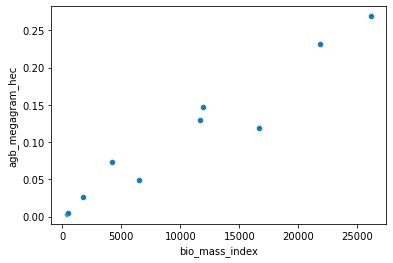

In [51]:
sns.scatterplot(data=plot, x="bio_mass_index", y="agb_megagram_hec")

In [97]:
### Plot STATS 

In [98]:
 plot.corr()

,RH10,RH15,RH20,RH25,RH30,RH35,RH40,RH45,RH50,RH55,...,RH96,RH97,RH98,RH99,RH100,bio_mass_index,agbd,m_agb,agb_megagram,agb_megagram_hec
RH10,1.000000,0.987330,0.970803,0.957175,0.944933,0.935895,0.927908,0.921583,0.916996,0.912481,...,0.836154,0.830613,0.822581,0.811956,0.789153,0.884246,0.872370,0.914920,0.914920,0.914920
RH15,0.987330,1.000000,0.996487,0.990788,0.984483,0.979045,0.973549,0.969061,0.965554,0.962036,...,0.901781,0.897145,0.890566,0.882610,0.864941,0.918721,0.907901,0.933789,0.933789,0.933789
RH20,0.970803,0.996487,1.000000,0.998639,0.995661,0.992479,0.988719,0.985458,0.982779,0.980006,...,0.929952,0.925889,0.920189,0.913697,0.898971,0.932602,0.921499,0.937926,0.937926,0.937926
RH25,0.957175,0.990788,0.998639,1.000000,0.999135,0.997384,0.994744,0.992313,0.990195,0.987949,...,0.944764,0.941092,0.936003,0.930431,0.917504,0.938444,0.927668,0.938297,0.938297,0.938297
RH30,0.944933,0.984483,0.995661,0.999135,1.000000,0.999435,0.997797,0.996084,0.994384,0.992541,...,0.955271,0.951922,0.947378,0.942485,0.930867,0.942870,0.932504,0.937811,0.937811,0.937811
RH35,0.935895,0.979045,0.992479,0.997384,0.999435,1.000000,0.999438,0.998446,0.997287,0.995902,...,0.963658,0.960581,0.956458,0.952065,0.941477,0.949721,0.938633,0.939968,0.939968,0.939968
RH40,0.927908,0.973549,0.988719,0.994744,0.997797,0.999438,1.000000,0.999716,0.999060,0.998114,...,0.970939,0.968136,0.964428,0.960429,0.950682,0.957093,0.944969,0.942369,0.942369,0.942369
RH45,0.921583,0.969061,0.985458,0.992313,0.996084,0.998446,0.999716,1.000000,0.999770,0.999195,...,0.975422,0.972801,0.969431,0.965723,0.956424,0.961252,0.949961,0.945208,0.945208,0.945208
RH50,0.916996,0.965554,0.982779,0.990195,0.994384,0.997287,0.999060,0.999770,1.000000,0.999811,...,0.978398,0.975909,0.972716,0.969216,0.960319,0.964337,0.953096,0.947836,0.947836,0.947836
RH55,0.912481,0.962036,0.980006,0.987949,0.992541,0.995902,0.998114,0.999195,0.999811,1.000000,...,0.981318,0.978996,0.975991,0.972674,0.964149,0.966143,0.954717,0.949164,0.949164,0.949164


In [99]:
correlations = plot.corr()

<AxesSubplot:>

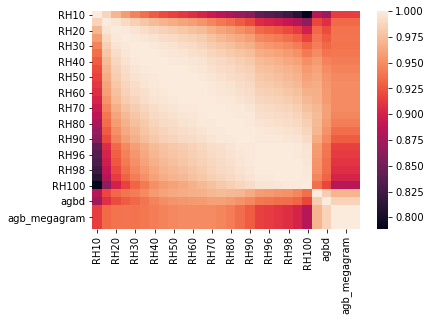

In [100]:
sns.heatmap(correlations)

#### plotRH

<AxesSubplot:>

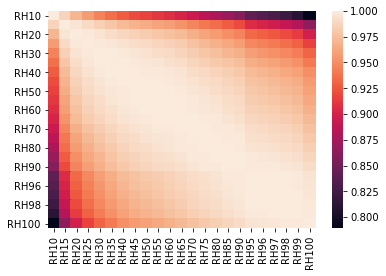

In [101]:
foo = ['plot', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100']

plotRH = plot[foo]
correlations = plotRH.corr()
sns.heatmap(correlations)

In [ ]:
__ Compare results 

# Conclusion and Discussion 

In [ ]:
__Answer research question and give summary conclusions 

In [ ]:
Unexpected findings 

In [ ]:
Establish newness 

In [ ]:
Explain discrepancies 

In [ ]:
A Good Article is the one that is read and cited 